In [1]:
import numpy as np
import pandas as pd


In [2]:
train = pd.read_csv('./train.csv',index_col = 'no',na_values=" ?")
train

FileNotFoundError: [Errno 2] No such file or directory: './train.csv'

In [ ]:
test = pd.read_csv('./test.csv',index_col = 'no',na_values=" ?")
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,NaN,245274,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


데이터 전처리 및 데이터 탐색

In [ ]:
# income 존재
train.columns
# age : 나이
# workclass : 고용 형태
# fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
# education : 교육 수준
# education_num : 교육 수준 수치
# marital_status: 결혼 상태
# occupation : 업종
# relationship : 가족 관계
# race : 인종
# sex : 성별
# capital_gain : 양도 소득
# capital_loss : 양도 손실
# hours_per_week : 주당 근무 시간
# native_country : 국적
# income : 수익 (예측해야 하는 값)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# income 없음
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [ ]:
# 결측치 개수확인
print(train.isnull().sum())
# 'workclass' 1663 
# 'occupation'  1668
# 'native-country' 495

age                  0
workclass         1663
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64


In [ ]:
print('test')
print(test.isnull().sum())
# 'workclass' 1136 
# 'occupation'  1141
# 'native-country' 362

test
age                  0
workclass         1136
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1141
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     362
dtype: int64


그럼 이 결측치들을 어떻게 처리를 해야할까
  > 일단 workclass는 하나가 엄청 많이 나와서 그걸로 다 채워주면 될듯
  > occupation 업종은 다양하게 분포가 되어있어서 인터넷/ <br> 기술통계확인은 언제하는거지 암튼 처리 해보면 나쁘진 않을듯
  > 국적..국적도 그닥 크게 필요할 것 같진 않은데

In [ ]:
# workclass 확인
train[train['workclass'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
20,18,NaN,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States,0
21,23,NaN,194096,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
25,19,NaN,50626,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
38,24,NaN,152719,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,15,Haiti,0
48,23,NaN,62507,Some-college,10,Never-married,NaN,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,28,NaN,196630,Assoc-voc,11,Separated,NaN,Unmarried,White,Female,0,0,40,Mexico,0
29248,50,NaN,23780,Masters,14,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,40,United-States,0
29281,22,NaN,110622,Bachelors,13,Never-married,NaN,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0


In [ ]:
# 보면 Private 사설이 가장 많음 그냥 여기로 결측치 1663개 넣어줌
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [ ]:
train['workclass'] = train['workclass'].fillna('Private')

In [ ]:
# workclass 결측값 채워줌! 끝
train.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1668
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     495
income               0
dtype: int64

In [ ]:
test['workclass']= test['workclass'].fillna('Private')
test['workclass']

no
29306              Private
29307              Private
29308              Private
29309     Self-emp-not-inc
29310              Private
               ...        
48838     Self-emp-not-inc
48839              Private
48840              Private
48841              Private
48842              Private
Name: workclass, Length: 19537, dtype: object

고럼 우리 occupation은 어떻게 채워주냐

In [ ]:
train[train['occupation'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
20,18,Private,220168,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,16,United-States,0
21,23,Private,194096,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
25,19,Private,50626,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,0
38,24,Private,152719,Some-college,10,Never-married,NaN,Own-child,Black,Female,0,0,15,Haiti,0
48,23,Private,62507,Some-college,10,Never-married,NaN,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,28,Private,196630,Assoc-voc,11,Separated,NaN,Unmarried,White,Female,0,0,40,Mexico,0
29248,50,Private,23780,Masters,14,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,40,United-States,0
29281,22,Private,110622,Bachelors,13,Never-married,NaN,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0


In [ ]:
train['occupation'].value_counts()

# 기술 지원, 공예 수리, 기타 서비스, 판매, 중역, 
# 전문 교수, 핸들러 청소부, 기계 조작 감독, Adm-사무, 
# 농업-어업, 운송-이사, Priv-house- 봉사, 보호 봉사, 군대.

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [ ]:
# Prof-specialty  417
# Craft-repair  417
# Exec-managerial 417
# Adm-clerical  417

In [ ]:
train['occupation'] = train['occupation'].fillna('Prof-specialty',limit=417)
train['occupation'] = train['occupation'].fillna('Craft-repair',limit=417)
train['occupation'] = train['occupation'].fillna('Exec-managerial',limit=417)
train['occupation'] = train['occupation'].fillna('Adm-clerical',limit=417)

In [ ]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
Prof-specialty         417
Craft-repair           417
Exec-managerial        417
Adm-clerical           417
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [ ]:
test['occupation'] = test['occupation'].fillna('Prof-specialty',limit=417)
test['occupation'] = test['occupation'].fillna('Craft-repair',limit=417)
test['occupation'] = test['occupation'].fillna('Exec-managerial',limit=417)
test['occupation'] = test['occupation'].fillna('Adm-clerical',limit=417)

In [ ]:
train['native-country'] = train['native-country'].fillna('United-States')

In [ ]:
train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
United-States                    495
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 

In [ ]:
test['native-country'] = test['native-country'].fillna('United-States')


In [ ]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [ ]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


상관관계 보기/ 레이블 인코딩을 한건가

In [ ]:
from sklearn.preprocessing import LabelEncoder
temp =train.columns[train.dtypes=='object']

le = LabelEncoder()
for i in temp:
    le.fit(train[i])
    train[i] =le.transform(train[i])

In [ ]:
train.corr()['income'].abs().sort_values(ascending=False)

income            1.000000
education-num     0.331798
relationship      0.257709
age               0.238460
hours-per-week    0.231045
capital-gain      0.221387
sex               0.215613
marital-status    0.198866
capital-loss      0.135645
education         0.081312
race              0.075287
workclass         0.057885
native-country    0.020600
occupation        0.007656
fnlwgt            0.002994
Name: income, dtype: float64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             29305 non-null  int64
 1   workclass       29305 non-null  int32
 2   fnlwgt          29305 non-null  int64
 3   education       29305 non-null  int32
 4   education-num   29305 non-null  int64
 5   marital-status  29305 non-null  int32
 6   occupation      29305 non-null  int32
 7   relationship    29305 non-null  int32
 8   race            29305 non-null  int32
 9   sex             29305 non-null  int32
 10  capital-gain    29305 non-null  int64
 11  capital-loss    29305 non-null  int64
 12  hours-per-week  29305 non-null  int64
 13  native-country  29305 non-null  int32
 14  income          29305 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [ ]:
temp =test.columns[test.dtypes=='object']

le = LabelEncoder()
for i in temp:
    le.fit(test[i])
    test[i] =le.transform(test[i])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19537 entries, 29306 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             19537 non-null  int64
 1   workclass       19537 non-null  int32
 2   fnlwgt          19537 non-null  int64
 3   education       19537 non-null  int32
 4   education-num   19537 non-null  int64
 5   marital-status  19537 non-null  int32
 6   occupation      19537 non-null  int32
 7   relationship    19537 non-null  int32
 8   race            19537 non-null  int32
 9   sex             19537 non-null  int32
 10  capital-gain    19537 non-null  int64
 11  capital-loss    19537 non-null  int64
 12  hours-per-week  19537 non-null  int64
 13  native-country  19537 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 1.6 MB


In [ ]:
import matplotlib.pyplot as plt  # 그래프 시각화
import seaborn as sns

<Axes: >

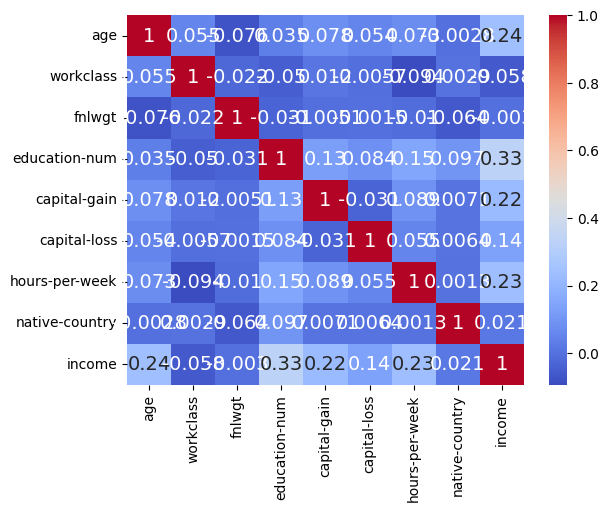

In [ ]:
heatmap_data = train[['age','workclass','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','native-country','income']]
sns.heatmap(heatmap_data.corr(), annot = True , cmap = 'coolwarm',linecolor="white" , annot_kws = {"size" : 14} )

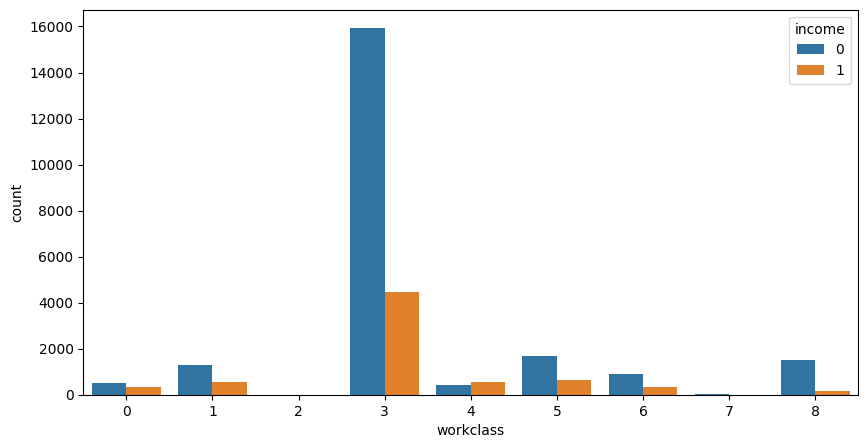

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(data = train ,x = 'workclass', hue = 'income')
plt.show()

# 자영업자들이 1인사람이 되게 많네

In [ ]:
X_train = train.loc[ : , 'age':'native-country' ]
y_train = train.loc[ : , 'income':]

X_test = test

In [ ]:
from sklearn.tree import DecisionTreeClassifier # tree분류
from sklearn.model_selection import cross_val_score # 교차 검증 도구

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer


In [ ]:
# 변형 객체 생성
std_scaler = StandardScaler()

# 훈련데이터의 모수 분포 저장
std_scaler.fit(X_train)

# 훈련 데이터 스케일링
X_train_scaled = std_scaler.transform(X_train)

# 테스트 데이터의 스케일링
X_test_scaled = std_scaler.transform(X_test)


In [ ]:
tree_model = DecisionTreeClassifier() # 객체 생성

# 학습 
tree_model.fit(X_train_scaled,y_train) # 지도학습 - 분류

# 예측
pre = tree_model.predict(X_test_scaled)

In [ ]:
result = pd.read_csv('./sample_submission.csv')
result['income']=pre
result

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,0
4,29310,1
...,...,...
19532,48838,0
19533,48839,1
19534,48840,1
19535,48841,0


In [ ]:
result.to_csv("data_scaling.csv",index=False)